# Prototyping notebook for future version

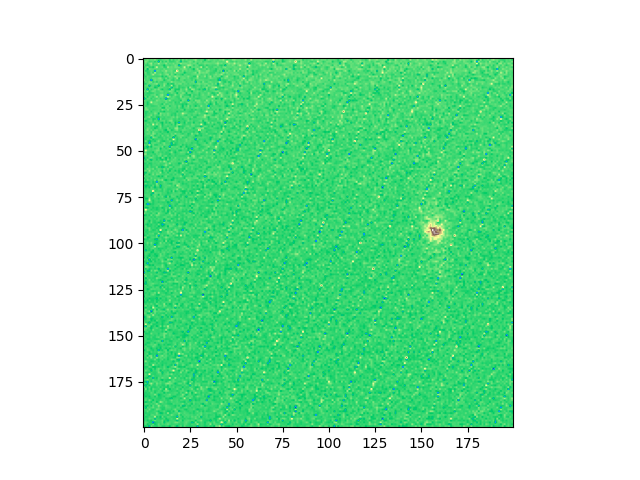

In [9]:
import numpy as np
import matplotlib.pyplot as plt


import pyref as rf
import polars as pl
import pandas as pd
from pathlib import Path

# import pyref as rf
data_path = Path("/home/hduva/projects/pyref/test/stack")
loader = rf.PrsoxrLoader(data_path)
loader.mask_image()

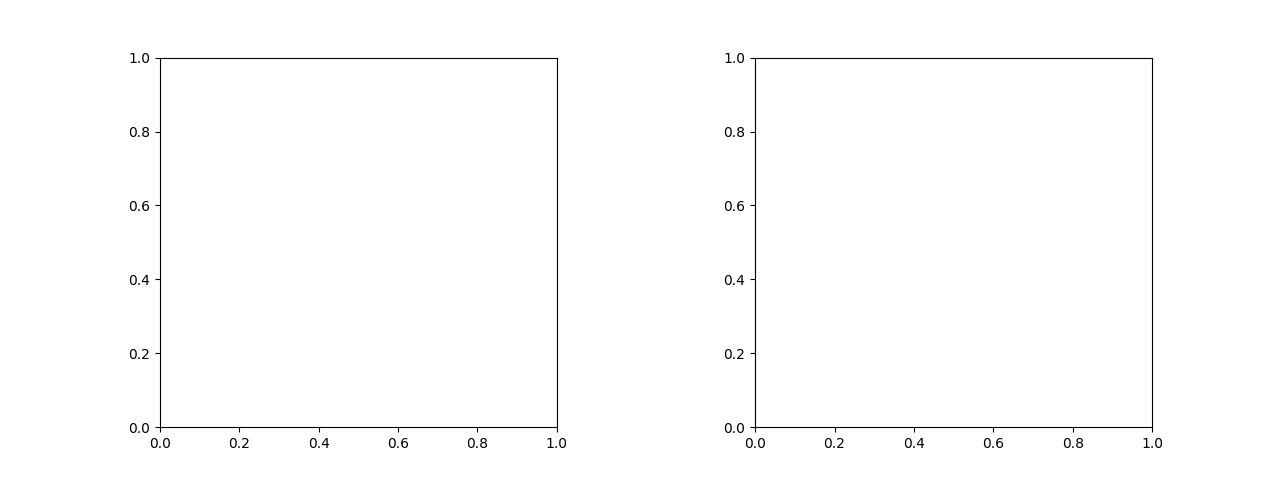

In [10]:
loader.check_spot()

In [11]:
loader()

Sample Name,θ [deg],I [arb. un.],δI [arb. un.],I₀ [arb. un.],δI₀ [arb. un.],Beamline Energy [eV],Q [Å⁻¹],r [a. u.],δr [a. u.]
str,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""F0072_unexps_85682""",0.0,1858.947785,2.431717,1873.153924,28.068411,280.0,0.0,0.992416,0.014984
"""F0072_unexps_85682""",0.0,1831.686792,2.420841,1873.153924,28.068411,280.0,0.0,0.977862,0.014875
"""F0072_unexps_85682""",0.0,1834.090543,2.418768,1873.153924,28.068411,280.0,0.0,0.979146,0.014885
"""F0072_unexps_85682""",0.0,1869.898571,2.434286,1873.153924,28.068411,280.0,0.0,0.998262,0.015028
"""F0072_unexps_85682""",0.0,1875.658228,2.437025,1873.153924,28.068411,280.0,0.0,1.001337,0.015051
…,…,…,…,…,…,…,…,…,…
"""F0072_PEB_85685""",22.778,385.770733,1.582416,2.0336e6,1.381034,288.6,0.113244,0.00019,0.000056
"""F0072_PEB_85685""",23.334,150.900757,1.438667,2.0336e6,1.381034,288.6,0.115856,0.000074,0.000082
"""F0072_PEB_85685""",23.888,34.948374,1.357915,2.0336e6,1.381034,288.6,0.118447,0.000017,0.000161


In [13]:
loader.plot_data()

:NdOverlay   [Sample Name,Beamline Energy [eV]]
   :Scatter   [Q [Å⁻¹]]   (r [a. u.])

In [5]:
loader.write_parquet()

In [1]:
df = pl.read_csv("thomas_test.csv")
pt = df.plot.points(
    x="Q",
    y="R",
    # yerr1="R_err",
    logy=True,
    hover_cols="all",
)
ref = refl.filter((pl.col("Beamline Energy [eV]") == 288.6) & (pl.col("θ [deg]") != 0))
pt2 = ref.plot.points(
    x="Q [Å⁻¹]",
    y="r [a. u.]",
    # yerr1="δr [a. u.]",
    logy=True,
    color="red",
    hover_cols="all",
)
pt * pt2

KeyboardInterrupt: 

In [20]:
display(ref.head(12))
display(df.head(12))

θ [deg],I [arb. un.],δI [arb. un.],I₀ [arb. un.],δI₀ [arb. un.],Beamline Energy [eV],Q [Å⁻¹],r [a. u.],δr [a. u.]
f64,f64,f64,f64,f64,f64,f64,f64,f64
1.0,1138.700449,2.111855,2214.076902,19.411598,288.6,0.005104,0.5143,0.006427
1.454,887.095092,1.982937,2214.076902,19.411598,288.6,0.007421,0.400661,0.005727
1.91,675.758372,1.873843,2214.076902,19.411598,288.6,0.009748,0.30521,0.00508
2.364,504.613538,1.77928,2214.076902,19.411598,288.6,0.012064,0.227911,0.004511
2.818,382.252576,1.709704,2214.076902,19.411598,288.6,0.01438,0.172646,0.00409
…,…,…,…,…,…,…,…,…
4.182,161.361242,1.577065,2214.076902,19.411598,288.6,0.02133,0.07288,0.003545
4.636,129.434581,1.552039,2214.076902,19.411598,288.6,0.023641,0.05846,0.003592
5.09,93.355472,1.528357,2214.076902,19.411598,288.6,0.02595,0.042165,0.003813


Energy,Q,Theta,R,R_err
f64,f64,f64,f64,f64
288.6,0.005105,1.0,0.511684,0.004629
288.6,0.007422,1.454,0.399204,0.003673
288.6,0.009748,1.91,0.30573,0.002893
288.6,0.012064,2.364,0.230103,0.002281
288.6,0.014379,2.818,0.175119,0.001859
…,…,…,…,…
288.6,0.021329,4.182,0.07692,0.001216
288.6,0.02364,4.636,0.060377,0.001362
288.6,0.02364,4.636,0.060621,0.001368


In [11]:
ref.to_csv("pyref_test.csv", columns=["θ [deg]", "Q [Å⁻¹]", "r [a. u.]"], index=False)
df.to_csv("thomas_test.csv", columns=["Q", "R"], index=False)

In [10]:
loader.write_parquet(f"{data['name'][n]}_{np.sort(loader.energy)[0]}.csv")

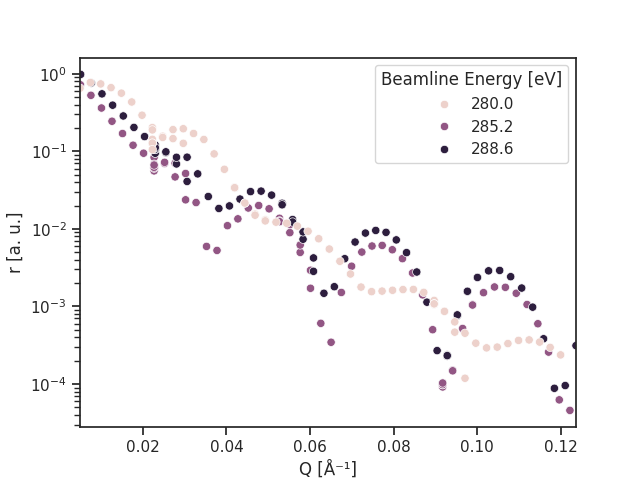

In [16]:
plt.close("all")
loader.plot_data(line=False)
plt.show()

# Photodiode Scans


Index(['Time of Day', 'Time (s)', 'Beamline Energy', 'EPU Polarization',
       'Coolstage Temp C', 'CCD Temperature', 'Beam Current', 'TEY signal',
       'Izero', 'Photodiode', 'AI 0', 'AI 3 Izero', 'AI 5', 'AI 6 BeamStop',
       'AI 7', 'Temperature Controller', 'PZT Shutter', 'Pause Trigger',
       'LV Memory', 'Time Stamp Error', 'Time Stamp Transmit Time',
       'Time Stamp Server Time', 'Camera Temp Setpoint'],
      dtype='object')


<Axes: xlabel='Beamline Energy'>

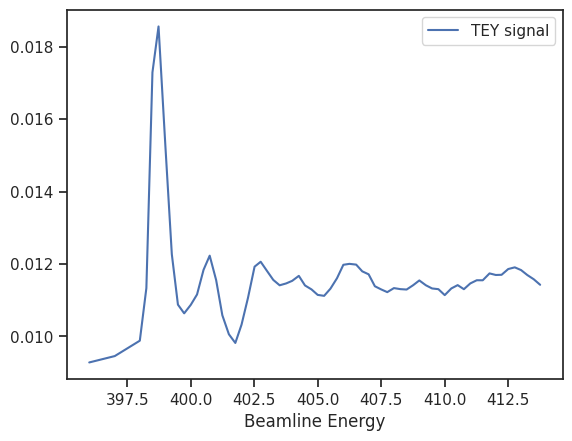

In [26]:
c_edge = pd.read_csv(data_path / "2024Nov/znpc_55_56954.txt", delimiter="\t", skiprows=15)
print(c_edge.columns)
c_edge.plot(x="Beamline Energy", y="TEY signal")


<Axes: xlabel='T-2T'>

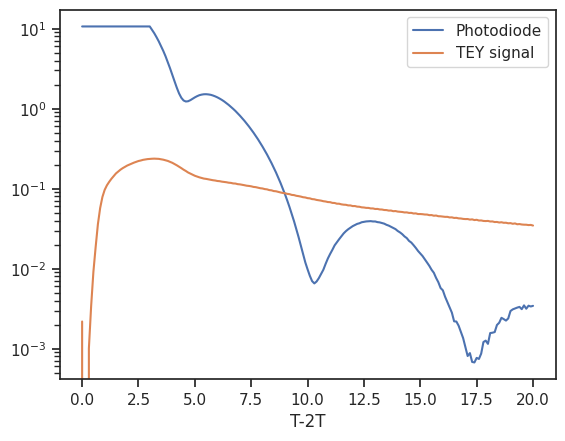

In [30]:
c_edge = pd.read_csv(data_path / "2024Nov/znpc_o_edge_xrr56957.txt", delimiter="\t", skiprows=14)

c_edge.plot(x="T-2T", y=["Photodiode", "TEY signal"], logy=True)

In [125]:
from skimage.feature import blob_doh, blob_log, blob_dog
from skimage.filters import gaussian, sobel
from ipywidgets import interact


@interact(x=(0, loader.meta.shape[0] - 1, 1), strength=(0, 10, 1))
def process_image(x, strength):
    frame = loader.meta.row(x, named=True)
    print(frame)
    shape = frame["Raw Shape"]
    img = np.reshape(frame["Raw"], shape[::-1])

    img = sobel(gaussian(img, sigma=strength))
    img = img / img.max()

    threshold = img.mean()

    print(threshold)
    blobs_doh = blob_log(
        img,
        exclude_border=True,
        overlap=0,
        min_sigma=strength,
        max_sigma=2 * strength,
        threshold=threshold,
    )
    blobs_doh[:, 2] = blobs_doh[:, 2] * np.sqrt(2)
    fig, ax = plt.subplots()

    print(blobs_doh)

    for blob in blobs_doh:
        y, x, r = blob
        ax.plot(x, y, "ro")
        c = plt.Circle((x, y), r, color="r", linewidth=2, fill=False)
        ax.add_patch(c)
    fig.canvas.draw_idle()
    ax.set_axis_off()
    ax.imshow(img, cmap="terrain", interpolation="none")
    plt.show()

interactive(children=(IntSlider(value=360, description='x', max=720), IntSlider(value=5, description='strength…

In [21]:
refl = loader()

shape: (10, 13)
┌────────┬────────────┬────────────┬────────────┬───┬───────────┬──────────┬───────────┬───────────┐
│ Sample ┆ Beamline   ┆ EPU Polari ┆ Horizontal ┆ … ┆ Lambda    ┆ Q [Å⁻¹]  ┆ I [arb.   ┆ δI [arb.  │
│ Theta  ┆ Energy     ┆ zation     ┆ Exit Slit  ┆   ┆ [Å]       ┆ ---      ┆ un.]      ┆ un.]      │
│ [deg]  ┆ [eV]       ┆ [deg]      ┆ Size [um]  ┆   ┆ ---       ┆ f64      ┆ ---       ┆ ---       │
│ ---    ┆ ---        ┆ ---        ┆ ---        ┆   ┆ f64       ┆          ┆ f64       ┆ f64       │
│ f64    ┆ f64        ┆ f64        ┆ f64        ┆   ┆           ┆          ┆           ┆           │
╞════════╪════════════╪════════════╪════════════╪═══╪═══════════╪══════════╪═══════════╪═══════════╡
│ 0.0    ┆ 285.0      ┆ 100.0      ┆ 3000.0     ┆ … ┆ 43.503228 ┆ 0.0      ┆ 1.5613e8  ┆ 38293.681 │
│        ┆            ┆            ┆            ┆   ┆           ┆          ┆           ┆ 249       │
│ 0.0    ┆ 285.0      ┆ 100.0      ┆ 3000.0     ┆ … ┆ 43.503228 ┆ 0.0      

In [27]:
loader.energy

[288.5, 286.7, 250.0, 285.0, 284.2, 290.2, 291.7, 283.7]

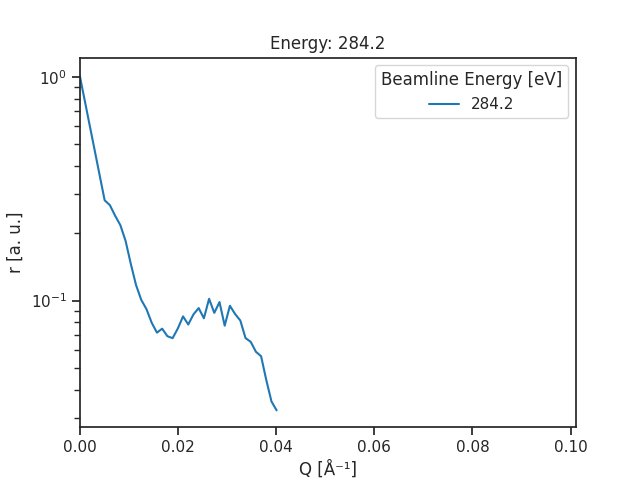

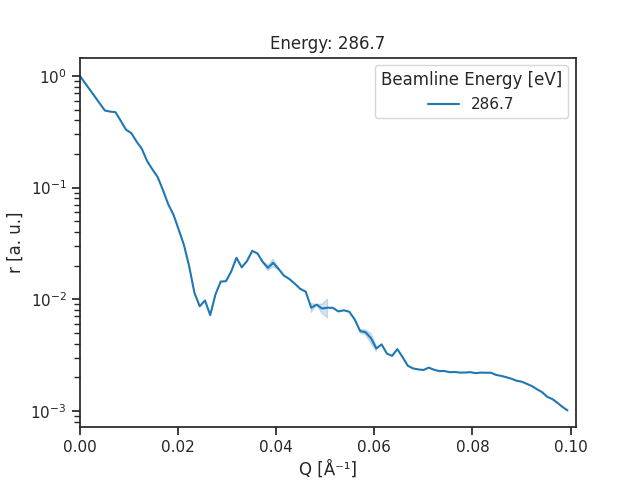

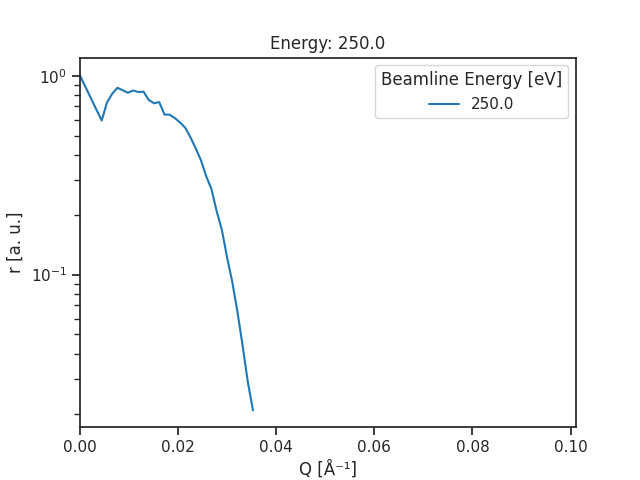

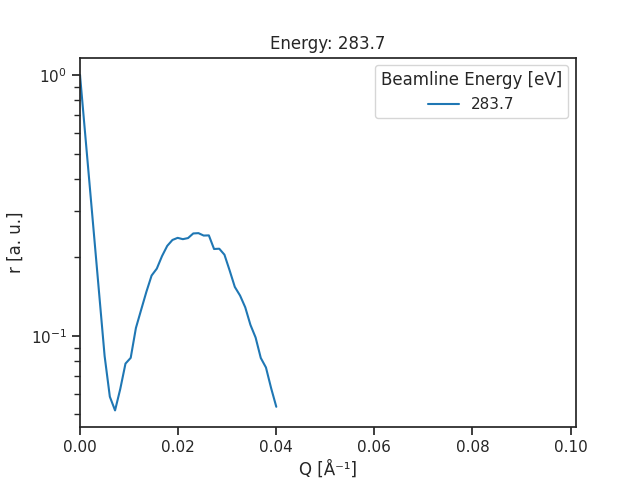

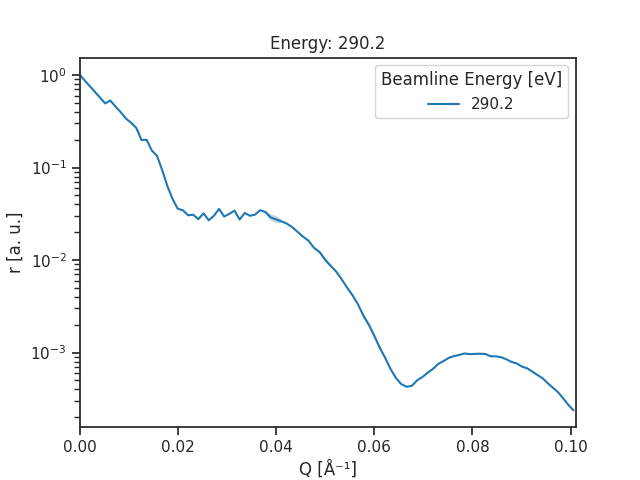

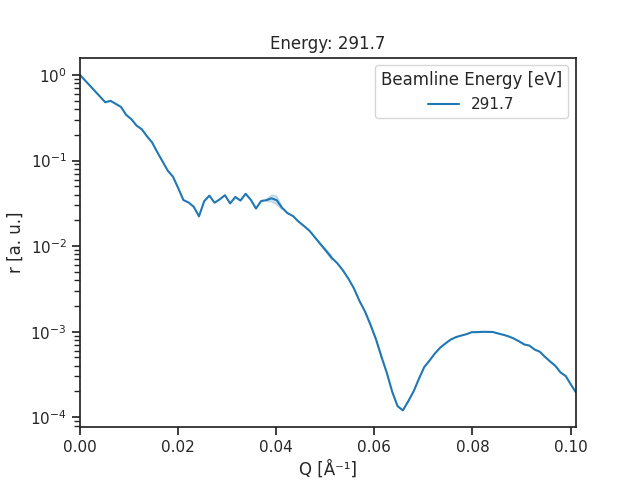

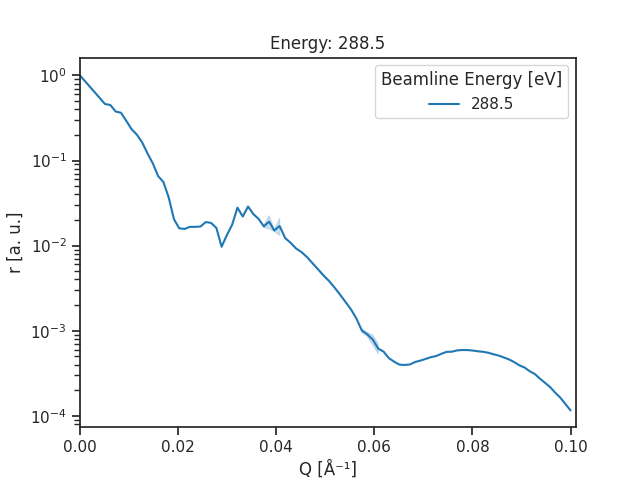

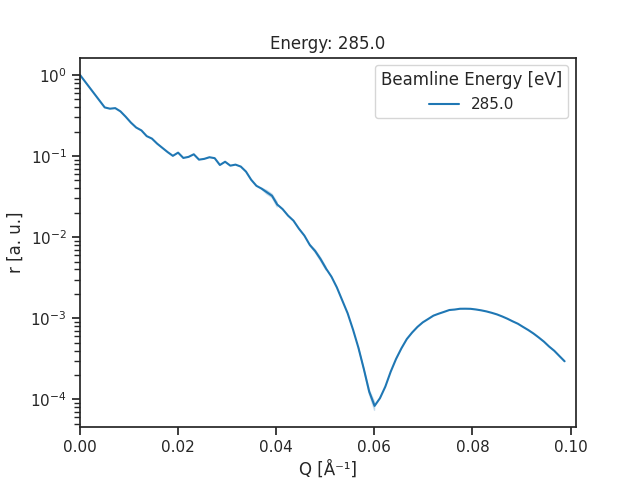

In [28]:
for i, energy in enumerate(loader.energy):
    fig, ax = plt.subplots()
    g = loader.plot_data(energies=energy)
    g.set(title=f"Energy: {energy}")
    ax = g

In [8]:
save_name = f"{data['energy'][n].to_list()}_{data['polarization'][n]}"
refl.write_csv(f"{save_name}.csv")

In [9]:
refl.count()

θ [deg],I [arb. un.],δI [arb. un.],I₀ [arb. un.],δI₀ [arb. un.],Beamline Energy [eV],Q [Å⁻¹],r [a. u.],δr [a. u.]
u32,u32,u32,u32,u32,u32,u32,u32,u32
518,518,518,518,518,518,518,518,518


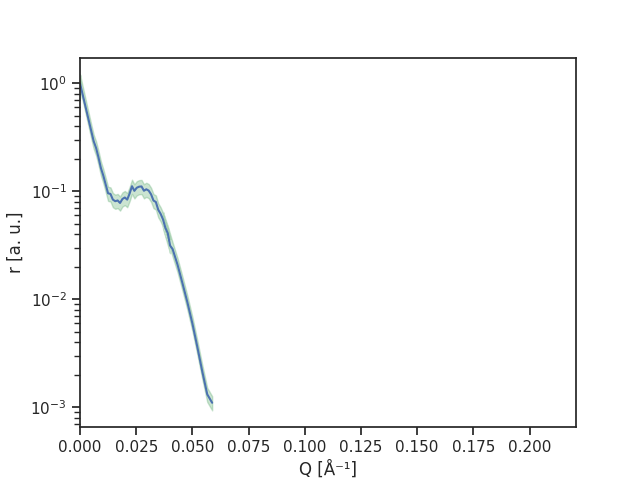

In [26]:
loader.plot_data()
plt.show()

In [24]:
refl.filter(pl.col("Q [Å⁻¹]") > 0.025).write_csv("znpc_250.csv")
refl = refl.filter(pl.col("Q [Å⁻¹]") > 0.025)

# Fitting

In [25]:
from pypxr.structure import PXR_MaterialSLD, PXR_SLD, PXR_Structure
from pypxr.reflectivity import PXR_ReflectModel
from refnx.dataset import ReflectDataset
from refnx.analysis import Transform, CurveFitter, Objective, GlobalObjective
from refnx._lib.emcee.moves.de import *
import json
import periodictable.xsf as xsf
from pyref.fitting.logp import LogpExtra

In [26]:
q = refl.select("Q [Å⁻¹]").to_numpy()[:, 0]
r = refl.select("r [a. u.]").to_numpy()[:, 0]
e = refl.select("δr [a. u.]").to_numpy()[:, 0]
xe = np.zeros_like(e)
dataset = ReflectDataset(np.vstack((q, r)))

In [27]:
# def n(compound: str, energy: float, density: float) -> compile:
#     energy_keV = 1e-3 * energy
#     n = xsf.index_of_refraction(compound, energy=energy_keV, density=density)
#     delta = 1 - np.real(n)
#     beta = -np.imag(n)
#     n = 1 - (1j * beta + delta)
#     return n


with open("ZnPc_RoomTemp.json") as f:
    znpc_mono_struct_file = json.load(f)

en = loader.meta.select("Beamline Energy [eV]").to_numpy()[0][0]

vac = PXR_MaterialSLD("", 0, en)(0, 0)
si = PXR_MaterialSLD("Si", 2.3, en, name="Si")(0, 10)
sio2 = PXR_MaterialSLD("SiO2", 1.6, en, name="SiO2")(
    znpc_mono_struct_file["SiO2"]["thickness"],
    znpc_mono_struct_file["SiO2"]["roughness"],
)
c_amor = PXR_MaterialSLD("C", 1.6, en, name="C_Amorphous")(
    znpc_mono_struct_file["C"]["thickness"], znpc_mono_struct_file["C"]["roughness"]
)

# znpc_surf = PXR_SLD(
#     (-0.001430114353418879 + 0.000532924066606992j), symmetry="uni", name="ZnPc_surface"
# )(
#     znpc_mono_struct_file["C32H16N8Zn"]["thickness"] * 0.1,
#     znpc_mono_struct_file["C32H16N8Zn"]["roughness"] * 0.1,
# )

znpc = PXR_MaterialSLD("C32H16N8Zn1", density=1.15, energy=en, name="ZnPc")(
    znpc_mono_struct_file["C32H16N8Zn"]["thickness"] * 0.8,
    znpc_mono_struct_file["C32H16N8Zn"]["roughness"] * 0.8,
)

# znpc_inter = PXR_SLD(
#     (-0.001430114353418879 + 0.000532924066606992j),
#     symmetry="uni",
#     name="ZnPc_interface",
# )(
#     znpc_mono_struct_file["C32H16N8Zn"]["thickness"] * 0.1,
#     znpc_mono_struct_file["C32H16N8Zn"]["roughness"] * 0.1,
# )

In [28]:
znpc.thick.setp(vary=True, bounds=(190, 250))
znpc.rough.setp(vary=True, bounds=(0, 20))
znpc.sld.density.setp(vary=True, bounds=(1, 2.5))

# znpc.sld.xx.setp(vary=True, bounds=(-0.001, 0.001))
# znpc.sld.zz.setp(vary=True, bounds=(-0.002, -0.005))

# znpc.sld.ixx.setp(vary=True, bounds=(0, 0.002))
# znpc.sld.izz.setp(vary=True, bounds=(0, 0.002))

# znpc_inter.thick.setp(vary=True, bounds=(0, 20))
# znpc_inter.rough.setp(vary=True, bounds=(0, 20))

# znpc_inter.sld.xx.setp(vary=True, bounds=(-0.001, 0.001))
# znpc_inter.sld.zz.setp(vary=True, bounds=(-0.002, -0.005))

# znpc_surf.thick.setp(vary=True, bounds=(0, 20))
# znpc_surf.rough.setp(vary=True, bounds=(0, 20))

# znpc_surf.sld.xx.setp(vary=True, bounds=(-0.001, 0.001))
# znpc_surf.sld.zz.setp(vary=True, bounds=(-0.002, -0.005))

c_amor.sld.density.setp(vary=True, bounds=(1, 2.5))
c_amor.thick.setp(vary=True, bounds=(0, 20))

________________________________________________________________________________
Parameters:      None      
<Parameter:    'scale'    , value=1          , bounds=[0.6, 1.1]>
<Parameter:     'bkg'     , value=0          , bounds=[1e-09, 1e-06]>
<Parameter: 'ZnPc_thick'  , value=157.153          , bounds=[190.0, 250.0]>
<Parameter:     'rho'     , value=1.15          , bounds=[1.0, 2.5]>
<Parameter: 'ZnPc_rough'  , value=5.77302          , bounds=[0.0, 20.0]>
<Parameter:'C_Amorphous_thick', value=6.08467          , bounds=[0.0, 20.0]>
<Parameter:     'rho'     , value=1.6          , bounds=[1.0, 2.5]>


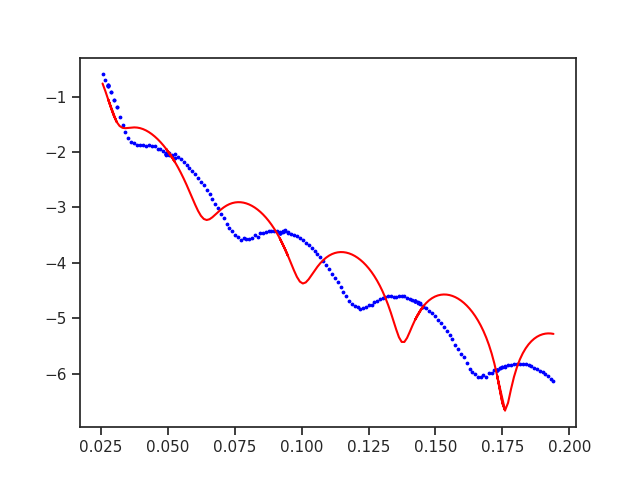

In [29]:
struct = vac | znpc | c_amor | sio2 | si
struct.plot()

model = PXR_ReflectModel(struct, pol="s", scale=1, bkg=0, dq=0, energy=en)
model.scale.setp(vary=True, bounds=(0.6, 1.1))
model.bkg.setp(vary=True, bounds=(1e-9, 1e-6))


objective = Objective(model, dataset, transform=Transform("logY"))
objective.logp_extra = LogpExtra(objective)
print(objective.varying_parameters())
objective.plot()
plt.show()

In [30]:
move = [(DEMove(sigma=1e-7), 0.95), (DEMove(sigma=1e-7), 0.05)]
nwalkers = 200
nsteps = 200
random_state = 1

fitter_1 = CurveFitter(objective, nwalkers=nwalkers, moves=move)
fitter_1.initialise("jitter")
fitter_1.sample(nsteps, random_state=random_state)

print(objective.varying_parameters())

objective.plot()
plt.show()

KeyboardInterrupt: 

In [87]:
znpc.sld.tensor.trace() / 3

(-0.001430114353418879+0.000532924066606992j)

Text(0, 0.5, 'log posterior')

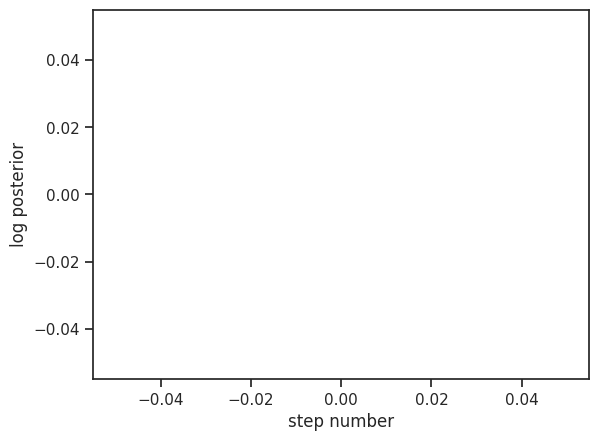

In [113]:
import matplotlib.pyplot as plt
%matplotlib inline
lp1 = fitter_1.logpost
fig, ax = plt.subplots()
ax.plot(-lp1)
ax.set_xlabel('step number')
ax.set_ylabel('log posterior')